# [Project] Customer Targeting Strategy for Bank Term Deposit Promotions

## Guideline

1. Data Import
2. Data Cleaning
3. EDA
4. Modeling
5. Conclusion

## 1. Data Import 

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.inspection import PartialDependenceDisplay

In [38]:
bank_df = pd.read_csv('/Users/florajeong/Desktop/UCLA/Pre UCLA/MSBA Prep/Codeit Data Science/bank.csv')
print(bank_df.shape)
bank_df.head()

(45211, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,1.0,-1,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,1.0,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,1.0,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,1.0,-1,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,1.0,-1,0,unknown,no


## 2. Data Cleaning

### 2.1 Null Values

In [39]:
# Check for Null Values 
bank_df.isnull().sum()

age          0
job          1
marital      1
education    3
default      0
balance      2
housing      4
loan         0
contact      1
day          1
month        2
campaign     1
pdays        0
previous     0
poutcome     1
y            0
dtype: int64

In [40]:
# Get all rows with null in any one of the columns 
bank_df[bank_df.isna().any(axis=1)] 

# Drop all rows with null in any one of the columns
bank_df = bank_df.dropna()

# Check null values are dropped
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### 2.2 Outliers

In [23]:
# Check for Outliers
bank_df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
count,45194.000000,45194,45194,45194,45194,45194.000000,45194,45194,45194,45194.000000,45194,45194.000000,45194.000000,45194.000000,45194,45194
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,9727,27202,23192,44379,NaN,25115,37953,29285,NaN,13749,NaN,NaN,NaN,36942,39906
mean,40.934881,NaN,NaN,NaN,NaN,1362.677855,NaN,NaN,NaN,15.810484,NaN,2.764305,40.213325,0.580542,NaN,NaN
std,10.618777,NaN,NaN,NaN,NaN,3045.253737,NaN,NaN,NaN,8.321401,NaN,3.098496,100.144388,2.303847,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,449.000000,NaN,NaN,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN


In [35]:
# Exclude Outliers (using IQR) 
numeric_columns = ['balance'] # For columns that needs removal of outliers 

bank_df_cleaned = bank_df 

for col in numeric_columns:
    Q1 = bank_df_cleaned[col].quantile(0.25)
    Q3 = bank_df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1 

    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    bank_df_cleaned = bank_df_cleaned[(bank_df_cleaned[col] >= lower_bound) & (bank_df_cleaned[col] <= upper_bound)]
    
bank_df_cleaned.describe()

,age,balance,day,campaign,pdays,previous
count,45173.000000,45173.000000,45173.000000,45173.000000,45173.000000,45173.000000
mean,40.928630,1334.066766,15.812742,2.763841,40.219224,0.580679
std,10.613693,2720.641367,8.321145,3.095990,100.153295,2.304314
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1425.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,44134.000000,31.000000,63.000000,871.000000,275.000000


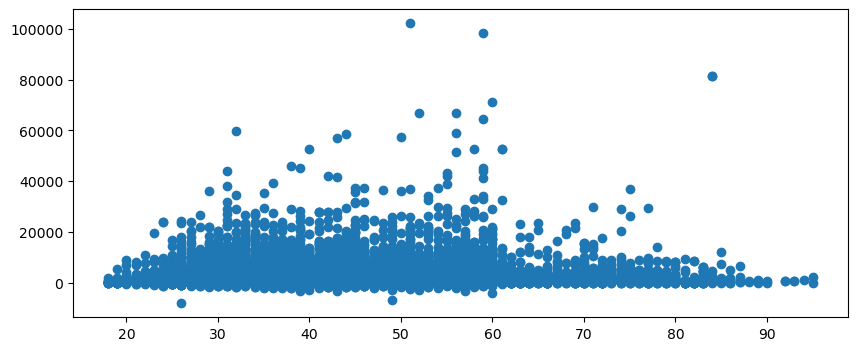

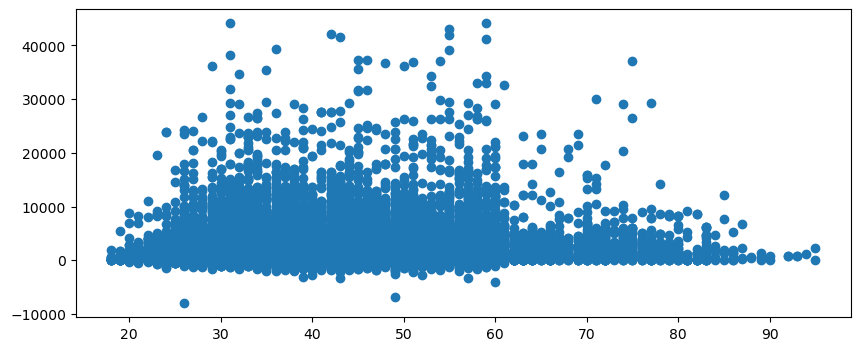

In [36]:
# Visualize that Outliers have been removed 

# Original Dataset 
plt.figure(figsize=(10,4))
plt.scatter(x=bank_df['age'], y=bank_df['balance'])
plt.show()

# Outlier Removed 
plt.figure(figsize=(10,4))
plt.scatter(x=bank_df_cleaned['age'], y=bank_df_cleaned['balance'])
plt.show()


In [42]:
# Pdays = -1 Means there was no communication in the past --> Change to NaN 
bank_df['pdays'] = bank_df['pdays'].replace(-1, np.nan)

### 2.3 Duplicates

In [43]:
bank_df.duplicated().sum() # If > 0, means there's dupliacted data 

16

In [45]:
# Look at the duplicates
bank_df[bank_df.duplicated(keep=False)].sort_values(by='age') 

# Drop Duplicates, Keep only 1
bank_df = bank_df.drop_duplicates() 

# check if the duplicates have been removed successfully
bank_df.duplicated().sum() # Should be 0 now  

0

## 3. EDA

Understanding the overall data and predicting which are most likely the most impactful features

### 3.1 Numeric Variables

In [47]:
numeric_features = bank_df.select_dtypes('number').columns
numeric_features

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], dtype='object')

In [48]:
bank_df.groupby('y')[numeric_features].mean()

,age,balance,day,campaign,pdays,previous
y,,,,,,
no,40.839358,1304.641138,15.894886,2.847054,234.191436,0.502557
yes,41.667360,1804.600605,15.160174,2.141263,192.521785,1.170575


Subscribed customers have higher balalnce, and was contacted recently

### 3.2 Categorical Variables

In [8]:
categorical_features = bank_df.select_dtypes('object').columns
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

##### Job

In [50]:
# Get customer count / Pct per job and subscription Y/N
count_df = bank_df.groupby(['y', 'job']).size().reset_index(name='count') 
count_df.sort_values(by='count', ascending=False).head()
count_df['pct'] = count_df.groupby('y')['count'].transform(lambda x: x / x.sum()) 
count_df.head()

,y,job,count,pct
0,no,admin.,4538,0.113763
1,no,blue-collar,9017,0.226047
2,no,entrepreneur,1363,0.034169
3,no,housemaid,1131,0.028353
4,no,management,8148,0.204262


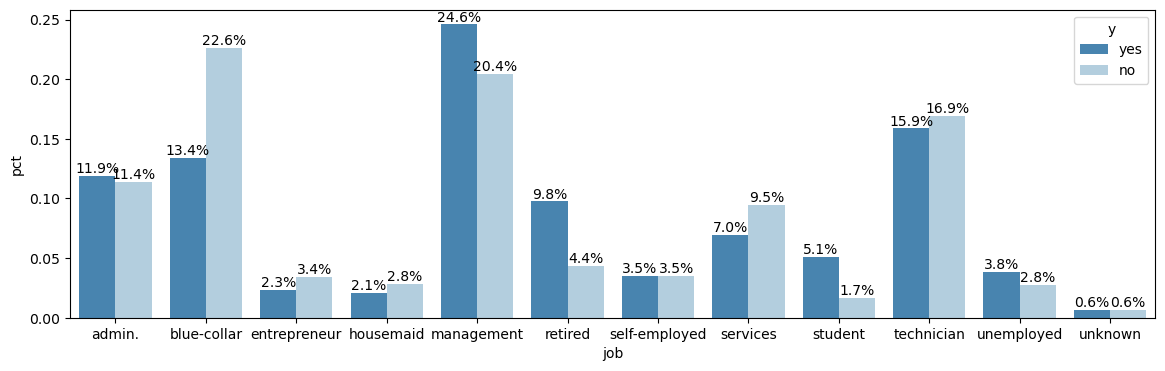

In [52]:
# Visualization 
fig, ax = plt.subplots(figsize=(14, 4))
sns.barplot(data=count_df, x="job", y="pct", hue="y", hue_order=['yes', 'no'], palette="Blues_r", ax=ax)

for c in ax.containers:
    ax.bar_label(c, fmt='{:.1%}');  # fmt = format. 소수점 한자리까지의 % 형태로 값을 나타내겠다는 의미입니다.

Among subscribers, individuals in management, retired, and student occupations are represented at relatively higher rates.
Management-level customers account for the largest share of subscribers overall.

##### Marital Status

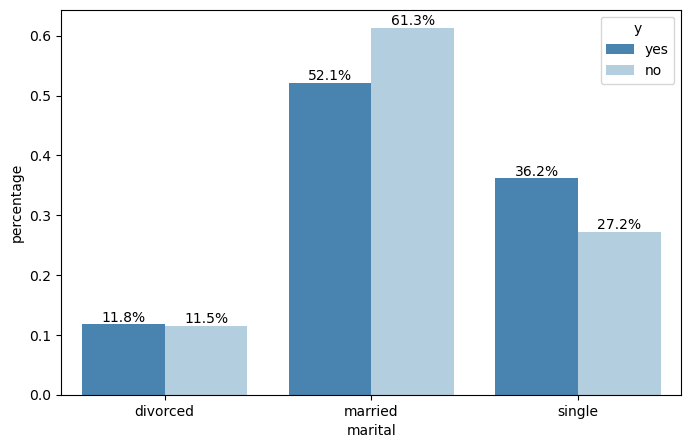

In [17]:
count_df = bank_df.groupby(['y', 'marital']).size().reset_index(name='count')
count_df['percentage'] = count_df.groupby('y')['count'].transform(lambda x: x / x.sum())

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=count_df, x="marital", y="percentage", hue="y", hue_order=['yes', 'no'], palette="Blues_r", ax=ax)

for c in ax.containers:
    ax.bar_label(c, fmt='{:.1%}');

The subscriber group shows a relatively higher proportion of single individuals.

## 4. Modeling  

### 4.1 Data Preparation

The pdays column represents the number of days that have passed since the last contact. However, it includes a value of -1, which indicates that the customer has never been contacted before. Because it can't be interpreted in a continuous numerical value, must be changed to categorical variable.



In [89]:
def pdays_category(pdays):  
    if pd.isna(pdays):
        return 'Not Contacted'
    elif pdays < 100:
        return '<100 Days'
    elif pdays < 200:
        return '<200 Days'
    elif pdays <300:
        return '<300 Days'
    else:
        return 'Greater than 300 Days' 

bank_df['pdays_category'] = bank_df['pdays'].apply(pdays_category)
bank_df[['pdays_category']].value_counts()
# bank_df.groupby('pdays_category')['pdays'].unique()

pdays_category       
Not Contacted            36921
<200 Days                 2879
Greater than 300 Days     2497
<300 Days                 1474
<100 Days                 1407
Name: count, dtype: int64

In [90]:
# Target Variable Assignemnt
y = bank_df['y']
y = y.apply(lambda x: 1 if x == 'yes' else 0)
y.value_counts()

y
0    39890
1     5288
Name: count, dtype: int64

In [91]:
# Feature Variables Assignment
X = bank_df.drop(['y','pdays'], axis=1)  #using pdays_category instead of pdays
X.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,pdays_category
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,1.0,0,unknown,Not Contacted
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,1.0,0,unknown,Not Contacted
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,1.0,0,unknown,Not Contacted
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,1.0,0,unknown,Not Contacted
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,1.0,0,unknown,Not Contacted


In [92]:
# One Hot Encode Categorical Features 
categorical_features = X.select_dtypes(include='object').columns # List of Categorical Features Column Name
print(categorical_features)

# return original df with now One hot encoded categorical feature columns
X = pd.get_dummies(X, columns=categorical_features, dtype='int')
X.head()


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'pdays_category'],
      dtype='object')


,age,balance,day,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,pdays_category_<100 Days,pdays_category_<200 Days,pdays_category_<300 Days,pdays_category_Greater than 300 Days,pdays_category_Not Contacted
0,58,2143.0,5.0,1.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,44,29.0,5.0,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,33,2.0,5.0,1.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,47,1506.0,5.0,1.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,33,1.0,5.0,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### 4.2 Initial Model

In [112]:
# Train/Test Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31624, 54)
(13554, 54)
(31624,)
(13554,)


In [122]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89     11958
           1       0.33      0.56      0.41      1596

    accuracy                           0.81     13554
   macro avg       0.63      0.70      0.65     13554
weighted avg       0.86      0.81      0.83     13554




- Class 0 = Not subscribed for term deposit
- Class 1 = Subscribed for term deposit 

#### **Model Evaluation** 

**Precision**: Model is more accurate in predicting class 0 than class 1.

**Recall**: There are more cases where the true label is 1 but the model predicts 0. 

**Because there are much more data for Class 0 (non subscribers), the model may have learned that predicting 0 is generally safer when uncertain, leading to a tendency to output 0 more frequently than 1.**

**F1-score**: balance of precision and recall. 41% for Class 1 implies that the model is not good at predicting subscribiers

**Accuracy**: The model achieves 81% accuracy but due to the significant class imbalance (i.e. higher class 0 samples than class 1), accuracy alone is not a sufficient measure of model performance. It’s more meaningful to consider the F1-scores for each class in this context.

### 4.3 Hyperparamter Tuning

Next is to identify better suited parameters through GridSearchCV and find a better performing model. 

**Precision is the most important evaluation metric here because minimizing false positives is crucial.** Falsely identifying customers as highly likely to subscribe can lead to wasted marketing budget on customers who are unlikely to respond, which reduces campaign efficiency. 

In [141]:
# Searching for best Parameters 
from sklearn.model_selection import GridSearchCV

hyper_parameter = {
    'n_estimators': [100, 200],  
    'max_depth': [None, 10, 20],  
    'class_weight': [None, 'balanced', 'balanced_subsample'] 
}

model = RandomForestClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=hyper_parameter,
                           scoring='precision', # Should prioritize Precision when selecting the best parameters
                           cv=3)  #


grid_search.fit(X_train, y_train)
print("Best Identified Parameters: ", grid_search.best_params_) 

Best Identified Parameters:  {'class_weight': None, 'max_depth': 10, 'n_estimators': 200}


#### Rerun the Model with the found Best Parameters 


In [126]:
# Best Parameters:  {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100}

# In this case 'balanced' makes sense because the sample size for each class is imbalanced
model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced') 
model.fit(X_train, y_train)
y_test_preidcted = model.predict(X_test)

In [130]:
# Model Performance of the new model
print(classification_report(y_test, y_test_preidcted))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11958
           1       0.70      0.17      0.27      1596

    accuracy                           0.89     13554
   macro avg       0.80      0.58      0.61     13554
weighted avg       0.88      0.89      0.86     13554



We see that precision has increased 70% (vs 33% in previous model). Overall accuracy has also increased to 89% (vs 81%)

### 4.4 Feature Importance 

In [131]:
ftr_imp_values = model.feature_importances_
# ftr_importances = pd.Series(ftr_imp_values, index=X_train.columns)
# ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]  # Get top 10 features based on importance

# or if want to put it in a dataframe:  
ftr_importances = pd.DataFrame({'importance': ftr_imp_values, 'features': X_train.columns})
ftr_top10 = ftr_importances.sort_values(by='importance', ascending=False)[:10] 

ftr_top10

,importance,features
47,0.107525,poutcome_success
32,0.084519,contact_unknown
0,0.072276,age
1,0.064526,balance
30,0.051637,contact_cellular
26,0.051095,housing_no
27,0.048302,housing_yes
2,0.045314,day
4,0.042123,previous
3,0.035123,campaign


/var/folders/wd/k8bhnlr94jb3l5fvbl852pph0000gn/T/ipykernel_59148/3582416288.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_top10['importance'], y=ftr_top10['features'], palette='Blues_r');


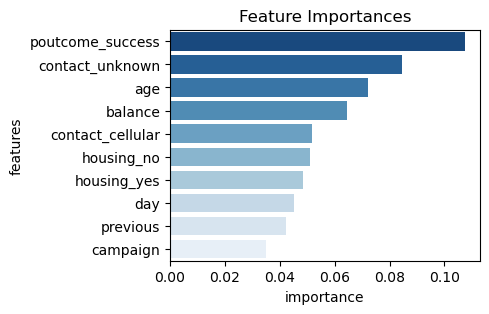

In [132]:
# Visualization 
plt.figure(figsize=(4,3))
plt.title('Feature Importances')
sns.barplot(x=ftr_top10['importance'], y=ftr_top10['features'], palette='Blues_r');

### 4.5 Partial Dependence Plot

The top features identified through feature importance analysis are:
1. **poutcome_success** – whether the previous campaign was successful
2. **contact_unknown** – availability of a contact method
3. **age**
4. **balance** - yearly average balance in chequing account 

To further explore the behavioral patterns of potential subscribers, Partial Dependence Plots (PDPs) can be drawn for these features. This will help understand how changes in each feature influence the likelihood of subscription, while holding other variables constant.

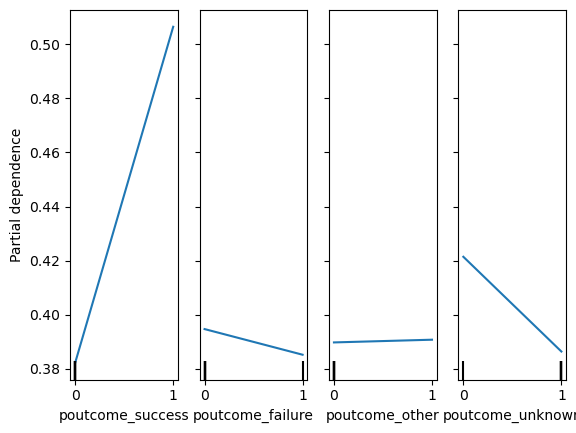

In [136]:
PartialDependenceDisplay.from_estimator(model, X_train,  
                                        features=['poutcome_success', 'poutcome_failure', 'poutcome_other', 'poutcome_unknown'],
                                        n_cols=4, 
                                        kind='average'
);

The likelihood of subscribing to a term deposit increases when poutcome_success is 1, indicating that **customers with a successful previous campaign are more likely to subscribe.**

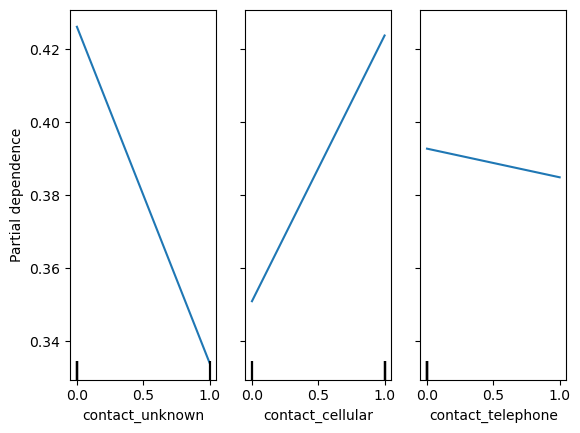

In [189]:
PartialDependenceDisplay.from_estimator(model, X_train, features=['contact_unknown', 'contact_cellular', 'contact_telephone'],  kind='average');

When the customer's contact is unknown, the ikelihood of term deposit subscription is predicted to be lower as value approahces 1. On the other hand, when contact_cellular approaches 1, the likelihood of subscription increases. 
This suggests that **customers with a known mobile contact are predicted to be more likely to subscribe** compared to those whose contact method is unknown.

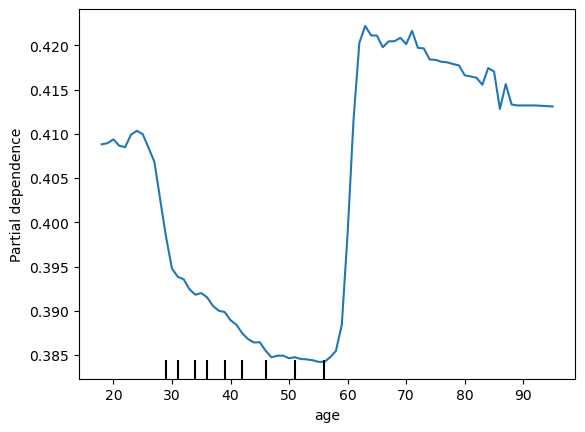

In [190]:
PartialDependenceDisplay.from_estimator(model, X_train, features=['age'],  kind='average');

Customers **under 20 and over 60 are predicted to have a higher likelihood of subscribing** to a term deposit.

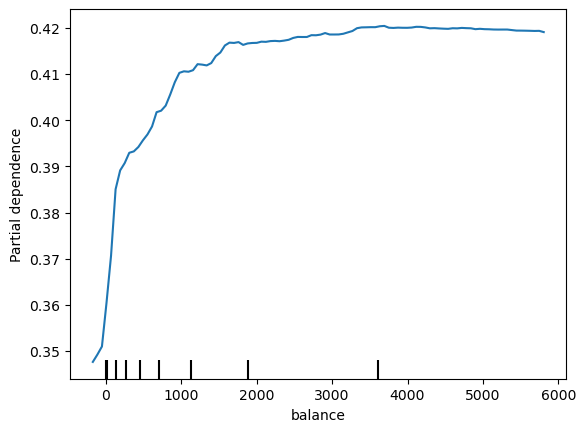

In [192]:
PartialDependenceDisplay.from_estimator(model, X_train, features=['balance'],  kind='average');

There is a general trend where a **higher balance is associated with a greater likelihood of subscribing to a term deposit.** However, the increase in subscription likelihood plateaus beyond approximately 2,000.

## 5. Conclusion

The most important factors influencing term deposit subscription and the key behavioral patterns of subscribers are as follows:
- Previous Campaign Outcome: Customers with a successful outcome in prior marketing campaigns are significantly more likely to subscribe again.
- Contact Method: Customers with a known mobile contact method show higher subscription rates
- Age: Subscription likelihood is higher among both younger customers (under 20s) and older customers (60s and above)
- Balance: Customers with average account balances exceeding 2,000 are more likely to subscribe

Based on these results, Bank A can high priority customers can be defined as customers who 
- Responded positively to previous campaigns
- Have a mobile contact method
- Are aged under 20 or over 60
- Have a yearly account balance of at least 2,000

**Final Strategy: Send personalized mobile campaigns to these high priority customers, as they represent the highest likelihood of term deposit subscription.**

**Additional Strategies to Improve Subscription Likelihood:**

Age-Based Targeted Campaign Messaging
- Younger Customers (teens to 20s): Promote term deposits as smart savings for young professionals beginning their financial journey.
- Older Customers (60+): Tailor messages focusing on retirement planning and long-term financial security.

Contact Method Improvement (For Long-Term Gains)
- Encourage customers to update or provide their mobile contact information, since customers reachable via mobile show significantly higher subscription rates.

